<a href="https://colab.research.google.com/github/ridhodori/machine-learning/blob/main/ML_Tubes2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Import Dataset


In [ ]:
data_train = pd.read_csv('https://raw.githubusercontent.com/khadrmd/Machine-Learning/main/kendaraan_train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/ridhodori/machine-learning/main/kendaraan_test.csv')
print(data_train.sample(5))
print(data_test.sample(5))

            id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
135797  135798          Pria  ...              157.0         0
225269  225270           NaN  ...              145.0         0
97350    97351          Pria  ...              267.0         0
77369    77370           NaN  ...              180.0         0
264528  264529          Pria  ...              200.0         0

[5 rows x 12 columns]
      Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
22547          Pria    25    1  ...              152                231        0
10666          Pria    30    1  ...              152                144        0
9428           Pria    55    1  ...               26                187        0
27930        Wanita    24    1  ...              152                247        0
2619         Wanita    51    1  ...               26                133        0

[5 rows x 11 columns]


In [ ]:
print('Number of instances = %d' % (data_train.shape[0]))
print('Number of attributes = %d' % (data_train.shape[1]))

Number of instances = 285831
Number of attributes = 12


In [ ]:
print('Number of instances = %d' % (data_test.shape[0]))
print('Number of attributes = %d' % (data_test.shape[1]))

Number of instances = 47639
Number of attributes = 11


In [ ]:
data_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


Drop unneeded columns

In [ ]:
data_train = data_train.drop(columns=['id'])
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### Finding and resolving null values

In [ ]:
data_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
data_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
data_train.dropna(inplace=True)
data_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Check for duplicate data

In [ ]:
data_train.duplicated().sum()

51

In [ ]:
data_test.duplicated().sum()

3

In [ ]:
#DEDUPLICATION
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()
print("Data_train duplicates: ",data_train.duplicated().sum())
print("Data_test duplicates: ",data_test.duplicated().sum())

Data_train duplicates:  0
Data_test duplicates:  0


# Convert string datatypes to float64

In [ ]:
# Jenis_Kelamin
data_train['Jenis_Kelamin'].replace('Wanita','1',inplace=True)
data_train['Jenis_Kelamin'].replace('Pria','0',inplace=True)
data_train['Jenis_Kelamin'] = data_train['Jenis_Kelamin'].astype(np.float64)

# Umur_Kendaraan
data_train['Umur_Kendaraan'].replace('< 1 Tahun','0',inplace=True)
data_train['Umur_Kendaraan'].replace('> 2 Tahun','1',inplace=True)
data_train['Umur_Kendaraan'].replace('1-2 Tahun','2',inplace=True)
data_train['Umur_Kendaraan'] = data_train['Umur_Kendaraan'].astype(np.float64)

# Kendaraan_Rusak
data_train['Kendaraan_Rusak'].replace('Pernah','1',inplace=True)
data_train['Kendaraan_Rusak'].replace('Tidak','0',inplace=True)
data_train['Kendaraan_Rusak'] = data_train['Kendaraan_Rusak'].astype(np.float64)

# Tertarik
data_train['Tertarik'] = data_train['Tertarik'].astype(np.float64)

In [ ]:
# Jenis_Kelamin
data_test['Jenis_Kelamin'].replace('Wanita','1',inplace=True)
data_test['Jenis_Kelamin'].replace('Pria','0',inplace=True)
data_test['Jenis_Kelamin'] = data_test['Jenis_Kelamin'].astype(np.float64)

# Umur_Kendaraan
data_test['Umur_Kendaraan'].replace('< 1 Tahun','0',inplace=True)
data_test['Umur_Kendaraan'].replace('> 2 Tahun','1',inplace=True)
data_test['Umur_Kendaraan'].replace('1-2 Tahun','2',inplace=True)
data_test['Umur_Kendaraan'] = data_test['Umur_Kendaraan'].astype(np.float64)

# Kendaraan_Rusak
data_test['Kendaraan_Rusak'].replace('Pernah','1',inplace=True)
data_test['Kendaraan_Rusak'].replace('Tidak','0',inplace=True)
data_test['Kendaraan_Rusak'] = data_test['Kendaraan_Rusak'].astype(np.float64)

# Tertarik
data_test['Tertarik'] = data_test['Tertarik'].astype(np.float64)

# SIM
data_test['SIM'] = data_test['SIM'].astype(np.float64)

# Sudah_Asuransi
data_test['Sudah_Asuransi'] = data_test['Sudah_Asuransi'].astype(np.float64)

In [ ]:
data_train.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171017.000000,171017.000000,171017.00000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000
mean,0.459381,38.818667,0.99793,26.411298,0.459791,1.090190,0.504447,30515.060573,112.256700,154.249876,0.121596
std,0.498349,15.532358,0.04545,13.262164,0.498382,0.974643,0.499982,17086.175432,54.108259,83.862904,0.326820
min,0.000000,20.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.00000,15.000000,0.000000,0.000000,0.000000,24376.000000,29.000000,81.000000,0.000000
50%,0.000000,36.000000,1.00000,28.000000,0.000000,2.000000,1.000000,31607.000000,140.000000,154.000000,0.000000
75%,1.000000,49.000000,1.00000,35.000000,1.000000,2.000000,1.000000,39328.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.00000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_test.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000,47636.000000
mean,0.456923,38.815329,0.997922,26.331367,0.457616,1.089659,0.504639,30628.244353,112.181879,154.442187,0.123016
std,0.498146,15.549248,0.045541,13.213754,0.498206,0.974882,0.499984,17403.922117,54.162915,83.641463,0.328459
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24397.500000,29.000000,82.000000,0.000000
50%,0.000000,36.000000,1.000000,28.000000,0.000000,2.000000,1.000000,31739.000000,135.000000,155.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,39475.250000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# **Normalization**

In [ ]:
# # copy the data
# df_min_max_scaled = data_train.copy()
  
# # apply normalization techniques  
# column = 'Umur'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Kode_Daerah'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Umur_Kendaraan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Premi'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Kanal_Penjualan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Lama_Berlangganan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 

# # view normalized data
# data_train = df_min_max_scaled
# data_train.describe()

In [ ]:
# # copy the data
# df_min_max_scaled = data_test.copy()
  
# # apply normalization techniques  
# column = 'Umur'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Kode_Daerah'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Umur_Kendaraan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Premi'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Kanal_Penjualan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
# column = 'Lama_Berlangganan'
# df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 

# # view normalized data
# data_test = df_min_max_scaled
# data_test.describe()

Check for outliers

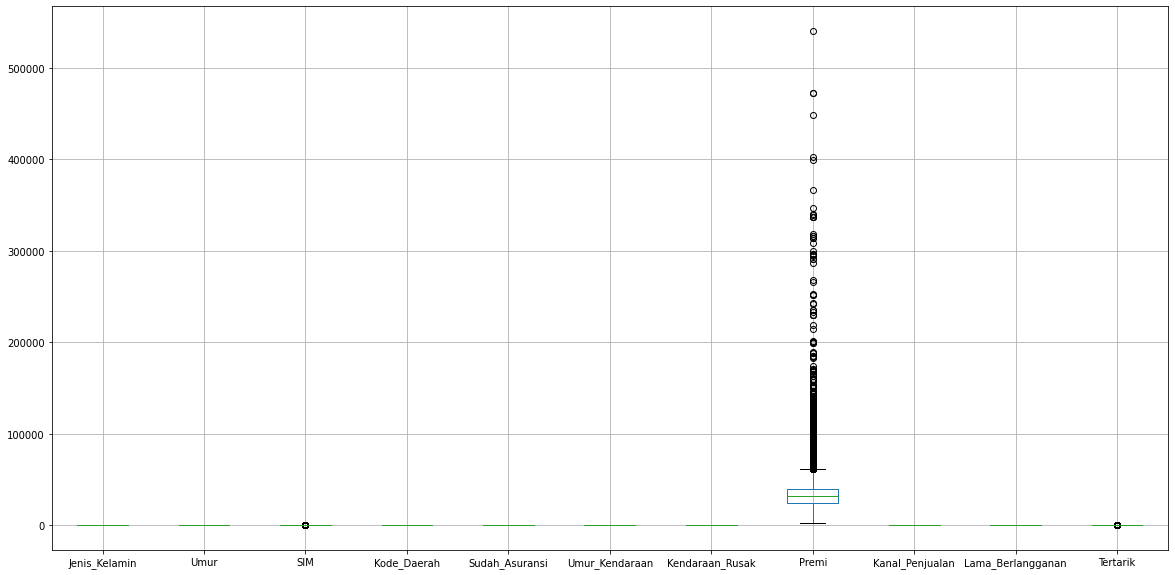

In [ ]:
data_train.boxplot(figsize= (20,10))

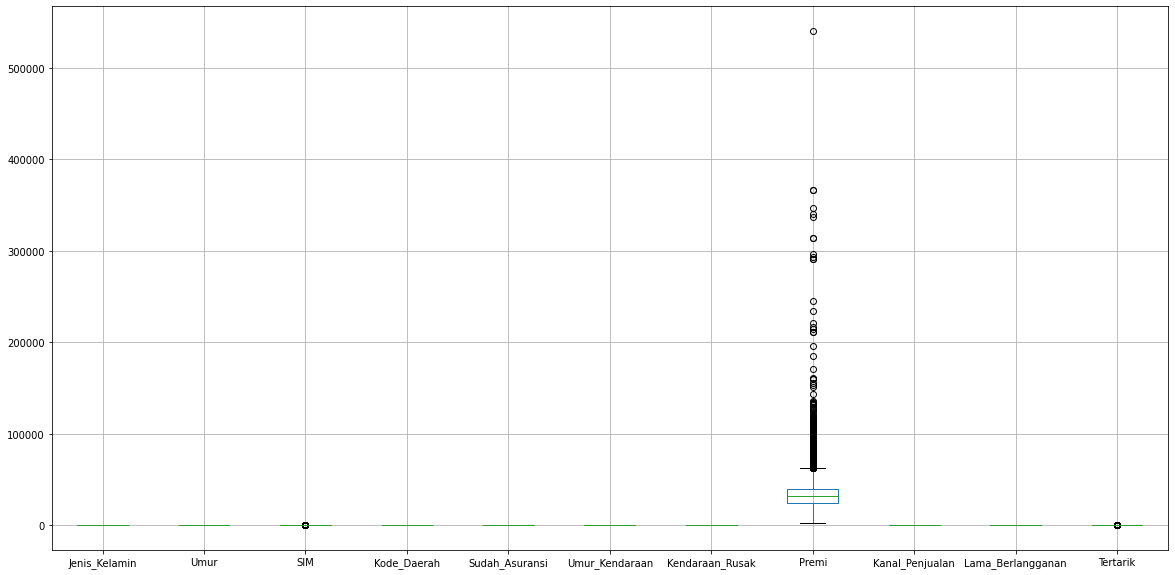

In [ ]:
data_test.boxplot(figsize= (20,10))

In [ ]:
# Replacing outliers with null for easy removal by using Inter Quartile Range method
for x in ['Premi']:
    q75,q25 = np.percentile(data_train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_train.loc[data_train[x] < min,x] = np.nan
    data_train.loc[data_train[x] > max,x] = np.nan

for x in ['Premi']:
    q75,q25 = np.percentile(data_test.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_test.loc[data_test[x] < min,x] = np.nan
    data_test.loc[data_test[x] > max,x] = np.nan

In [ ]:
print(data_train.isna().sum())
print(data_test.isna().sum())

Jenis_Kelamin           0
Umur                    0
SIM                     0
Kode_Daerah             0
Sudah_Asuransi          0
Umur_Kendaraan          0
Kendaraan_Rusak         0
Premi                4672
Kanal_Penjualan         0
Lama_Berlangganan       0
Tertarik                0
dtype: int64
Jenis_Kelamin           0
Umur                    0
SIM                     0
Kode_Daerah             0
Sudah_Asuransi          0
Umur_Kendaraan          0
Kendaraan_Rusak         0
Premi                1271
Kanal_Penjualan         0
Lama_Berlangganan       0
Tertarik                0
dtype: int64


In [ ]:
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

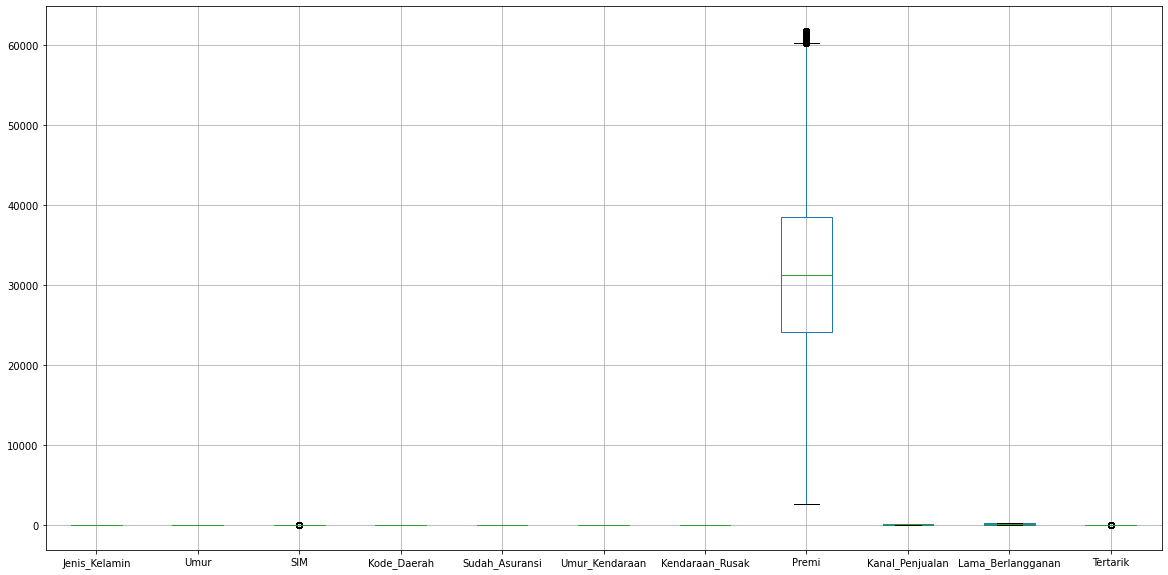

In [ ]:
data_train.boxplot(figsize= (20,10))

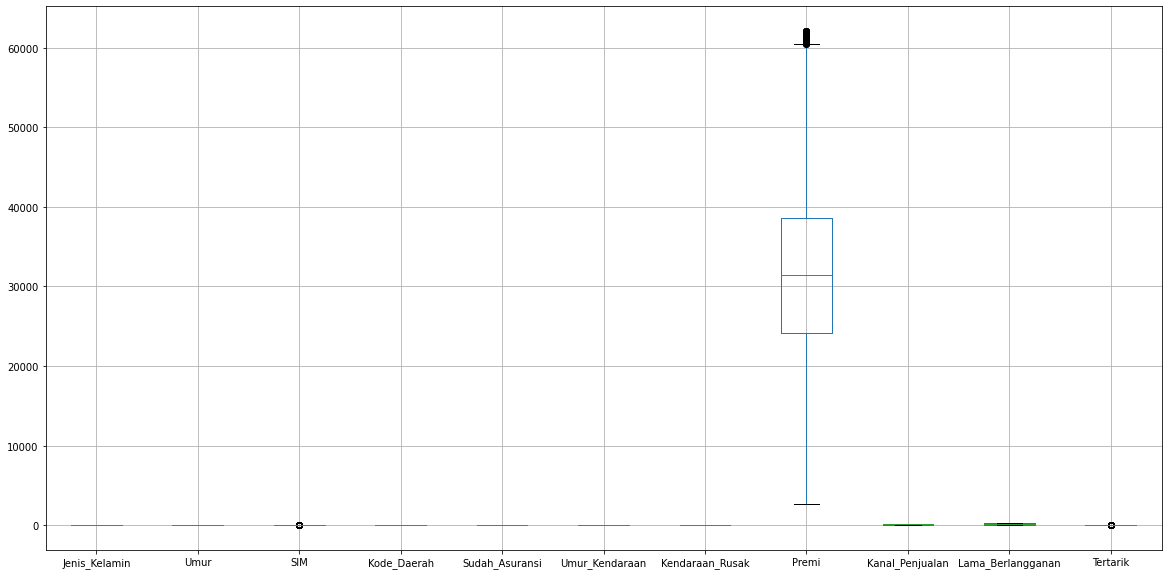

In [ ]:
data_test.boxplot(figsize= (20,10))

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166345 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      166345 non-null  float64
 1   Umur               166345 non-null  float64
 2   SIM                166345 non-null  float64
 3   Kode_Daerah        166345 non-null  float64
 4   Sudah_Asuransi     166345 non-null  float64
 5   Umur_Kendaraan     166345 non-null  float64
 6   Kendaraan_Rusak    166345 non-null  float64
 7   Premi              166345 non-null  float64
 8   Kanal_Penjualan    166345 non-null  float64
 9   Lama_Berlangganan  166345 non-null  float64
 10  Tertarik           166345 non-null  float64
dtypes: float64(11)
memory usage: 15.2 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46365 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis_Kelamin      46365 non-null  float64
 1   Umur               46365 non-null  int64  
 2   SIM                46365 non-null  float64
 3   Kode_Daerah        46365 non-null  int64  
 4   Sudah_Asuransi     46365 non-null  float64
 5   Umur_Kendaraan     46365 non-null  float64
 6   Kendaraan_Rusak    46365 non-null  float64
 7   Premi              46365 non-null  float64
 8   Kanal_Penjualan    46365 non-null  int64  
 9   Lama_Berlangganan  46365 non-null  int64  
 10  Tertarik           46365 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.2 MB


# **Logistic Regression**

In [ ]:
x, y = data_train.drop(columns = ['Tertarik']), data_train[['Tertarik']]

In [ ]:
print(x.info())
print("=====================================================")
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166345 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      166345 non-null  float64
 1   Umur               166345 non-null  float64
 2   SIM                166345 non-null  float64
 3   Kode_Daerah        166345 non-null  float64
 4   Sudah_Asuransi     166345 non-null  float64
 5   Umur_Kendaraan     166345 non-null  float64
 6   Kendaraan_Rusak    166345 non-null  float64
 7   Premi              166345 non-null  float64
 8   Kanal_Penjualan    166345 non-null  float64
 9   Lama_Berlangganan  166345 non-null  float64
dtypes: float64(10)
memory usage: 14.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 166345 entries, 0 to 285830
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Tertarik  166345 non-null  float64
dtypes: float64(1)
memor

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3322)


In [ ]:
print(xtrain)
print(xtest)

        Jenis_Kelamin  Umur  SIM  ...    Premi  Kanal_Penjualan  Lama_Berlangganan
218997            0.0  47.0  1.0  ...  27866.0            124.0              281.0
10176             0.0  27.0  1.0  ...  28029.0             26.0              143.0
237017            1.0  37.0  1.0  ...  22572.0            154.0              151.0
84662             1.0  39.0  1.0  ...  47028.0            124.0               31.0
185342            0.0  49.0  1.0  ...  52519.0             26.0               24.0
...               ...   ...  ...  ...      ...              ...                ...
222915            0.0  60.0  1.0  ...   2630.0            155.0              297.0
209890            0.0  32.0  1.0  ...   2630.0            160.0              286.0
99488             0.0  44.0  1.0  ...  28674.0             26.0              157.0
54538             0.0  23.0  1.0  ...  52019.0             26.0               47.0
93192             1.0  47.0  1.0  ...  36619.0             26.0              267.0

[13

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate output variable (y) with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  #derivative w.r.t bias
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def difference(value_1, value_2):
  return abs(100*(value_2-value_1))


In [ ]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(xtrain.values, ytrain.values.reshape(-1))
predictions_1 = regressor.predict(xtest)
predictions_2 = regressor.predict(data_test.drop(columns=['Tertarik']).values)
acc_1 = accuracy(ytest.values.reshape(-1), predictions_1)
acc_2 = accuracy(data_test['Tertarik'], predictions_2)
print("Accuracy in training :", acc_1)
print("Accuracy in testing :", acc_2)
print("Difference percentage : {0:.3f}%".format(difference(acc_1, acc_2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Accuracy in training : 0.877062731070967
Accuracy in testing : 0.8776879111398684
Difference percentage : 0.063%


## we comparing with the library

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(xtrain))
X_test_scaled = pd.DataFrame(sc_X.transform(xtest))

logi = LogisticRegression(random_state = 0, penalty = 'none')
logi.fit(xtrain, ytrain)

kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = xtrain, y = ytrain, cv = kfold,scoring=scoring)
acc_logi.mean()

lib_predictions = (logi.predict_proba(xtest)[:,1] >= 0.5)
lib_acc_1 = accuracy_score(ytest, lib_predictions)
prec = precision_score(ytest, lib_predictions)
rec = recall_score(ytest, lib_predictions)
f1_1 = f1_score(ytest, lib_predictions)

results = pd.DataFrame([['Logistic Regression',lib_acc_1,acc_logi.mean(),prec,rec, f1_1]],
               columns = ['Model', 'Accuracy', 'Cross Val Accuracy','Precision', 'Recall', 'F1 Score'])
results

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.877063,0.87698,0.0,0.0,0.0
